In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import requests
import json

In [4]:
lacar_url='https://data.cityofnewyork.us/resource/bm4k-52h4.json'
response=requests.get(lacar_url)
if response.status_code == 200:
    data = response.json()
    df_v = pd.json_normalize(data)
else:
    print(f"Failed to retrieve data: {response.status_code}")

df_v.head()

,unique_id,collision_id,crash_date,crash_time,vehicle_id,state_registration,vehicle_type,contributing_factor_1,vehicle_make,vehicle_year,...,pre_crash,point_of_impact,vehicle_damage,public_property_damage,contributing_factor_2,vehicle_damage_1,vehicle_damage_2,vehicle_damage_3,vehicle_model,public_property_damage_type
0,10385780,100201,2012-09-07T00:00:00.000,9:03,1,NY,PASSENGER VEHICLE,Unspecified,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19140702,4213082,2019-09-23T00:00:00.000,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,Driver Inattention/Distraction,TOYT -CAR/SUV,2002,...,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,N,Unspecified,NaN,NaN,NaN,NaN,NaN
2,14887647,3307608,2015-10-02T00:00:00.000,17:18,2,NY,TAXI,Driver Inattention/Distraction,NaN,NaN,...,Going Straight Ahead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14889754,3308693,2015-10-04T00:00:00.000,20:34,1,NY,PASSENGER VEHICLE,Unspecified,NaN,NaN,...,Parked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14400270,297666,2013-04-25T00:00:00.000,21:15,1,NY,PASSENGER VEHICLE,Other Vehicular,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   unique_id                    1000 non-null   object
 1   collision_id                 1000 non-null   object
 2   crash_date                   1000 non-null   object
 3   crash_time                   1000 non-null   object
 4   vehicle_id                   1000 non-null   object
 5   state_registration           967 non-null    object
 6   vehicle_type                 979 non-null    object
 7   contributing_factor_1        977 non-null    object
 8   vehicle_make                 463 non-null    object
 9   vehicle_year                 463 non-null    object
 10  travel_direction             482 non-null    object
 11  vehicle_occupants            472 non-null    object
 12  driver_sex                   420 non-null    object
 13  driver_license_status        402 n

In [6]:
df_v=df_v.drop(['crash_date', 'vehicle_id' ,'state_registration','vehicle_damage_1','vehicle_damage_2',
                'vehicle_damage_3','vehicle_model','public_property_damage_type', 'contributing_factor_2'], axis=1)
df_v.head()

,unique_id,collision_id,crash_time,vehicle_type,contributing_factor_1,vehicle_make,vehicle_year,travel_direction,vehicle_occupants,driver_sex,driver_license_status,driver_license_jurisdiction,pre_crash,point_of_impact,vehicle_damage,public_property_damage
0,10385780,100201,9:03,PASSENGER VEHICLE,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19140702,4213082,8:15,Station Wagon/Sport Utility Vehicle,Driver Inattention/Distraction,TOYT -CAR/SUV,2002,North,1,M,Licensed,NY,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,N
2,14887647,3307608,17:18,TAXI,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Going Straight Ahead,NaN,NaN,NaN
3,14889754,3308693,20:34,PASSENGER VEHICLE,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parked,NaN,NaN,NaN
4,14400270,297666,21:15,PASSENGER VEHICLE,Other Vehicular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_v['crash_time'] = pd.to_datetime(df_v['crash_time'], errors='coerce')
df_v['unique_id'] = pd.to_numeric(df_v['unique_id'], errors='coerce')
df_v['collision_id'] = pd.to_numeric(df_v['collision_id'], errors='coerce')
df_v['vehicle_occupants'] = pd.to_numeric(df_v['vehicle_occupants'], errors='coerce')

In [8]:
df_v=df_v.dropna()
df_v

,unique_id,collision_id,crash_time,vehicle_type,contributing_factor_1,vehicle_make,vehicle_year,travel_direction,vehicle_occupants,driver_sex,driver_license_status,driver_license_jurisdiction,pre_crash,point_of_impact,vehicle_damage,public_property_damage
1,19140702,4213082,2024-03-26 08:15:00,Station Wagon/Sport Utility Vehicle,Driver Inattention/Distraction,TOYT -CAR/SUV,2002,North,1.0,M,Licensed,NY,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,N
5,17044639,3434155,2024-03-26 17:35:00,4 dr sedan,Driver Inattention/Distraction,MERZ -CAR/SUV,2015,East,2.0,M,Licensed,FL,Merging,Right Front Bumper,Right Front Bumper,N
6,19138701,4229067,2024-03-26 13:15:00,Bus,Unspecified,FRHT-TRUCK/BUS,2006,East,13.0,M,Licensed,NY,Parked,Left Front Quarter Panel,Left Front Quarter Panel,N
7,17303317,3503027,2024-03-26 12:39:00,Station Wagon/Sport Utility Vehicle,Driver Inattention/Distraction,FORD -CAR/SUV,2005,Southwest,2.0,F,Licensed,NY,Going Straight Ahead,Center Front End,Center Front End,N
10,17285715,3487936,2024-03-26 15:40:00,Convertible,Unspecified,VOLK -CAR/SUV,2013,South,1.0,M,Licensed,NY,Stopped in Traffic,Right Rear Bumper,Right Rear Bumper,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,17334558,3472782,2024-03-26 23:50:00,Garbage or Refuse,Pavement Slippery,KW-TRUCK/BUS,2008,South,2.0,M,Licensed,NY,Going Straight Ahead,Center Front End,Center Front End,N
986,19140213,4229175,2024-03-26 16:00:00,Sedan,Unspecified,HOND -CAR/SUV,2002,Unknown,1.0,F,Licensed,NY,Merging,Left Front Bumper,Left Front Bumper,N
995,19140351,4229134,2024-03-26 18:26:00,Motorcycle,Unspecified,SUZI -MCL,2017,East,1.0,M,Licensed,PA,Going Straight Ahead,Center Front End,Right Rear Quarter Panel,N
996,17212623,3524493,2024-03-26 12:45:00,Sedan,Reaction to Uninvolved Vehicle,HOND -CAR/SUV,2001,Southwest,1.0,M,Licensed,VA,Going Straight Ahead,Center Front End,Center Front End,N


In [9]:
def get_val_counts(coln):
    value_v=df_v[coln].value_counts()
    return value_v

In [10]:
get_val_counts('driver_license_status')

driver_license_status
Licensed      377
Permit          6
Unlicensed      5
Name: count, dtype: int64

In [11]:
get_val_counts('pre_crash')

pre_crash
Going Straight Ahead          215
Parked                         27
Making Right Turn              26
Making Left Turn               23
Stopped in Traffic             22
Slowing or Stopping            16
Backing                        13
Changing Lanes                 13
Merging                         8
Making U Turn                   7
Starting from Parking           7
Entering Parked Position        5
Passing                         3
Other*                          2
Avoiding Object in Roadway      1
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Left Front Quarter Panel'),
  Text(1, 0, 'Right Front Bumper'),
  Text(2, 0, 'Center Front End'),
  Text(3, 0, 'Right Rear Bumper'),
  Text(4, 0, 'Left Side Doors'),
  Text(5, 0, 'Right Rear Quarter Panel'),
  Text(6, 0, 'Left Rear Quarter Panel'),
  Text(7, 0, 'Right Side Doors'),
  Text(8, 0, 'Center Back End'),
  Text(9, 0, 'No Damage'),
  Text(10, 0, 'Left Front Bumper'),
  Text(11, 0, 'Trailer'),
  Text(12, 0, 'Other'),
  Text(13, 0, 'Left Rear Bumper'),
  Text(14, 0, 'Right Front Quarter Panel')])

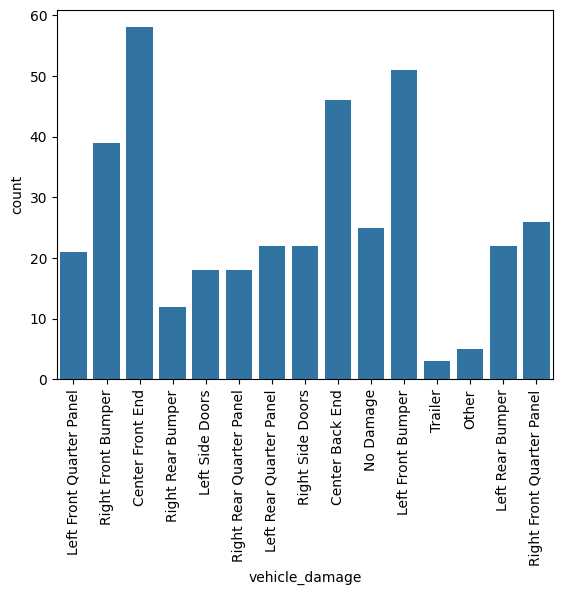

In [12]:
sns.countplot(x=df_v['vehicle_damage'])
plt.xticks(rotation=90)

In [13]:
dr=['Driver Inattention/Distraction', 'Backing Unsafely', 'Failure to Yield Right-of-Way', 'Turning Improperly', 'Driver Inexperience', 'Unsafe Speed', 'Aggressive Driving/Road Rage','Passing Too Closely', 'Passing or Lane Usage Improper', 'Traffic Control Disregarded', 'Other Vehicular', 'Reaction to Uninvolved Vehicle']
mr=['Unspecified','Brakes Defective', 'Physical Disability', 'Oversized Vehicle', 'Pavement Slippery', 'Steering Failure', 'Outside Car Distraction']

In [14]:
df_v['crash_reason'] = df_v['contributing_factor_1'].apply(
    lambda x: 'Driver Error' if x in dr else 'Traffic Error')

df_v.head()

,unique_id,collision_id,crash_time,vehicle_type,contributing_factor_1,vehicle_make,vehicle_year,travel_direction,vehicle_occupants,driver_sex,driver_license_status,driver_license_jurisdiction,pre_crash,point_of_impact,vehicle_damage,public_property_damage,crash_reason
1,19140702,4213082,2024-03-26 08:15:00,Station Wagon/Sport Utility Vehicle,Driver Inattention/Distraction,TOYT -CAR/SUV,2002,North,1.0,M,Licensed,NY,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,N,Driver Error
5,17044639,3434155,2024-03-26 17:35:00,4 dr sedan,Driver Inattention/Distraction,MERZ -CAR/SUV,2015,East,2.0,M,Licensed,FL,Merging,Right Front Bumper,Right Front Bumper,N,Driver Error
6,19138701,4229067,2024-03-26 13:15:00,Bus,Unspecified,FRHT-TRUCK/BUS,2006,East,13.0,M,Licensed,NY,Parked,Left Front Quarter Panel,Left Front Quarter Panel,N,Traffic Error
7,17303317,3503027,2024-03-26 12:39:00,Station Wagon/Sport Utility Vehicle,Driver Inattention/Distraction,FORD -CAR/SUV,2005,Southwest,2.0,F,Licensed,NY,Going Straight Ahead,Center Front End,Center Front End,N,Driver Error
10,17285715,3487936,2024-03-26 15:40:00,Convertible,Unspecified,VOLK -CAR/SUV,2013,South,1.0,M,Licensed,NY,Stopped in Traffic,Right Rear Bumper,Right Rear Bumper,N,Traffic Error


([0, 1], [Text(0, 0, 'Driver Error'), Text(1, 0, 'Traffic Error')])

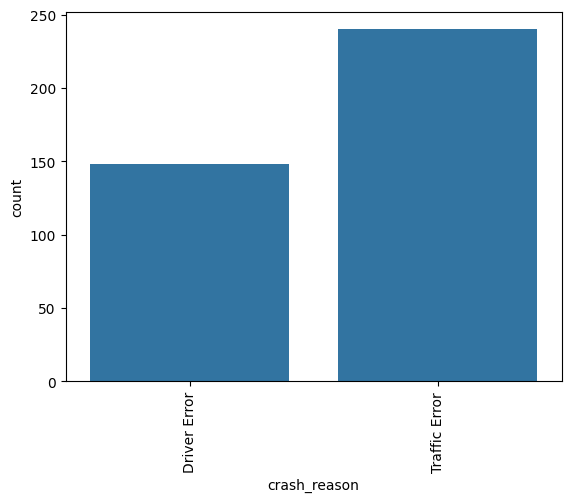

In [15]:
sns.countplot(x=df_v['crash_reason'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Going Straight Ahead'),
  Text(1, 0, 'Merging'),
  Text(2, 0, 'Parked'),
  Text(3, 0, 'Stopped in Traffic'),
  Text(4, 0, 'Entering Parked Position'),
  Text(5, 0, 'Slowing or Stopping'),
  Text(6, 0, 'Making Left Turn'),
  Text(7, 0, 'Making Right Turn'),
  Text(8, 0, 'Backing'),
  Text(9, 0, 'Changing Lanes'),
  Text(10, 0, 'Making U Turn'),
  Text(11, 0, 'Passing'),
  Text(12, 0, 'Other*'),
  Text(13, 0, 'Starting from Parking'),
  Text(14, 0, 'Avoiding Object in Roadway')])

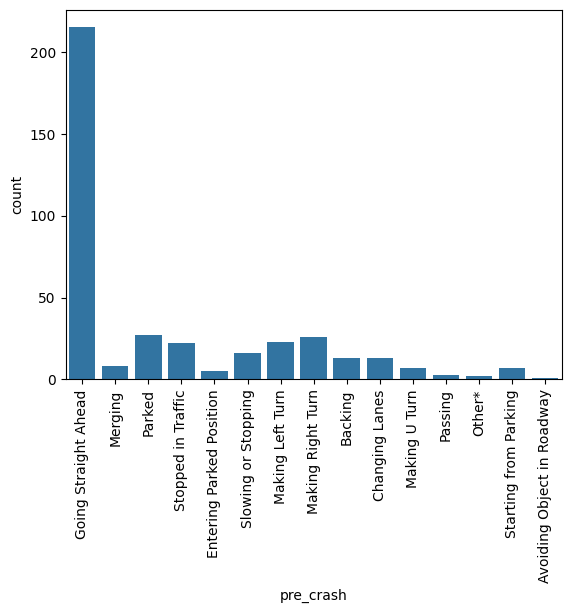

In [16]:
sns.countplot(x=df_v['pre_crash'])
plt.xticks(rotation=90)

In [17]:
get_val_counts('vehicle_occupants')

vehicle_occupants
1.0     271
2.0      60
0.0      32
3.0      15
4.0       6
5.0       2
13.0      1
7.0       1
Name: count, dtype: int64

### Naive Bayes

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

In [19]:
le = LabelEncoder()
y_encoded = le.fit_transform(df_v['crash_reason'])
X = df_v.drop(columns=['crash_reason'])

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=42)

In [20]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ]
)

In [22]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultinomialNB())
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['vehicle_type', 'contributing_factor_1', 'vehicle_make', 'vehicle_year',
       'travel_direction', 'driver_sex', 'driver_license_status',
       'driver_license_jurisdiction', 'pre_crash', 'point_of_impact',
       'vehicle_damage', 'public_property_damage'],
      dtype='object'))])),
                ('classifier', MultinomialNB())])

In [23]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0])

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        56
           1       0.99      0.98      0.98       100

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156



In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
conf_mat = confusion_matrix(y_test, y_pred)

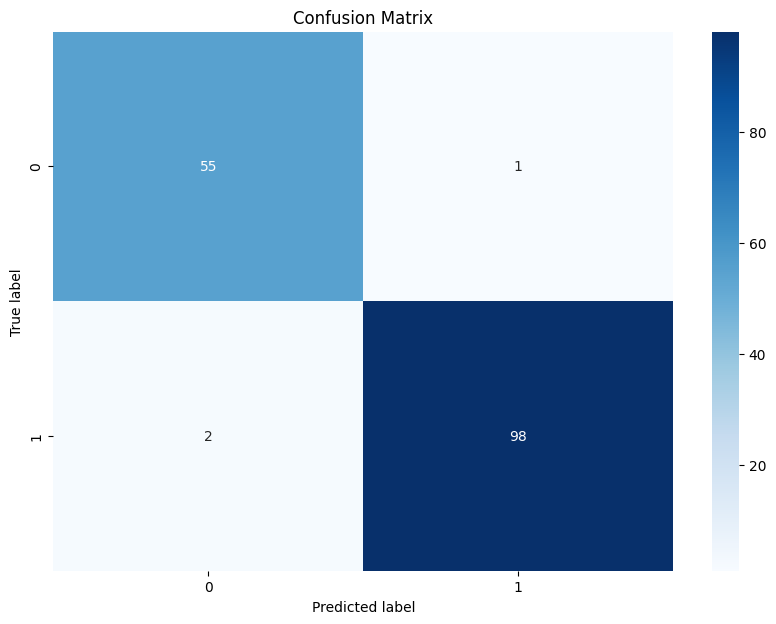

In [27]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [28]:
y_train_pred = model.predict(X_train)

In [29]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

In [30]:
train_accuracy

0.9870689655172413

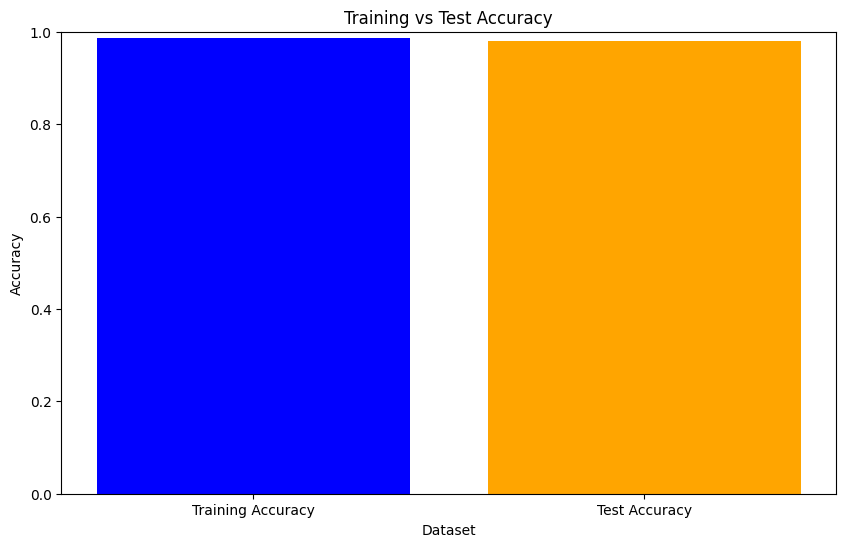

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(['Training Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy')
plt.ylim([0, 1])  # Assuming accuracy scores are between 0 and 1
plt.show()

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [33]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

cv_scores = np.abs(cv_scores)

print("Mean CV Loss:", np.mean(cv_scores))

test_loss = mean_squared_error(y_test, y_pred)

print("Test Loss:", test_loss)

Mean CV Loss: 0.08177613320999075
Test Loss: 0.019230769230769232


### Decision Trees

In [34]:
df_v.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388 entries, 1 to 999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   unique_id                    388 non-null    int64         
 1   collision_id                 388 non-null    int64         
 2   crash_time                   388 non-null    datetime64[ns]
 3   vehicle_type                 388 non-null    object        
 4   contributing_factor_1        388 non-null    object        
 5   vehicle_make                 388 non-null    object        
 6   vehicle_year                 388 non-null    object        
 7   travel_direction             388 non-null    object        
 8   vehicle_occupants            388 non-null    float64       
 9   driver_sex                   388 non-null    object        
 10  driver_license_status        388 non-null    object        
 11  driver_license_jurisdiction  388 non-null    objec

In [35]:
from sklearn.tree import DecisionTreeClassifier
model1 = model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

model1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['vehicle_type', 'contributing_factor_1', 'vehicle_make', 'vehicle_year',
       'travel_direction', 'driver_sex', 'driver_license_status',
       'driver_license_jurisdiction', 'pre_crash', 'point_of_impact',
       'vehicle_damage', 'public_property_damage'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

In [36]:
y_pred1 = model1.predict(X_test)
y_pred1

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0])

In [37]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        56
           1       0.95      0.99      0.97       100

    accuracy                           0.96       156
   macro avg       0.97      0.95      0.96       156
weighted avg       0.96      0.96      0.96       156



In [61]:
model2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=10, min_samples_split=2, random_state=42))
])

model2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['vehicle_type', 'contributing_factor_1', 'vehicle_make', 'vehicle_year',
       'travel_direction', 'driver_sex', 'driver_license_status',
       'driver_license_jurisdiction', 'pre_crash', 'point_of_impact',
       'vehicle_damage', 'public_property_damage'],
      dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=10, random_state=42))])

In [62]:
y_pred2 = model2.predict(X_test)
y_pred2

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0])

In [63]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92        56
           1       0.93      0.99      0.96       100

    accuracy                           0.95       156
   macro avg       0.96      0.93      0.94       156
weighted avg       0.95      0.95      0.95       156



In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
model3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

param_grid = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 10, 20],
    'classifier__min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(model3, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['vehicle_type', 'contributing_factor_1', 'vehicle_make', 'vehicle_year',
       'travel_direction', 'driver_sex', 'driver_license_status',
       'driver_license_jurisdiction', 'pre_crash', 'point_of_impact',
       'vehicle_damage', 'public_property_damage'],
      dtype='object'))])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [3, 5, 10, None],
                         'classifier__min_samples_leaf': [1, 5, 10],
                         'classifier__min_samples_split': [2, 10, 20]},
             scoring='accuracy')

In [43]:
y_pred3 = grid_search.predict(X_test)
y_pred3

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0])

In [44]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        56
           1       0.95      0.99      0.97       100

    accuracy                           0.96       156
   macro avg       0.97      0.95      0.96       156
weighted avg       0.96      0.96      0.96       156



In [45]:
print(grid_search.best_params_)

{'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}


In [46]:
conf_mat1 = confusion_matrix(y_test, y_pred1)

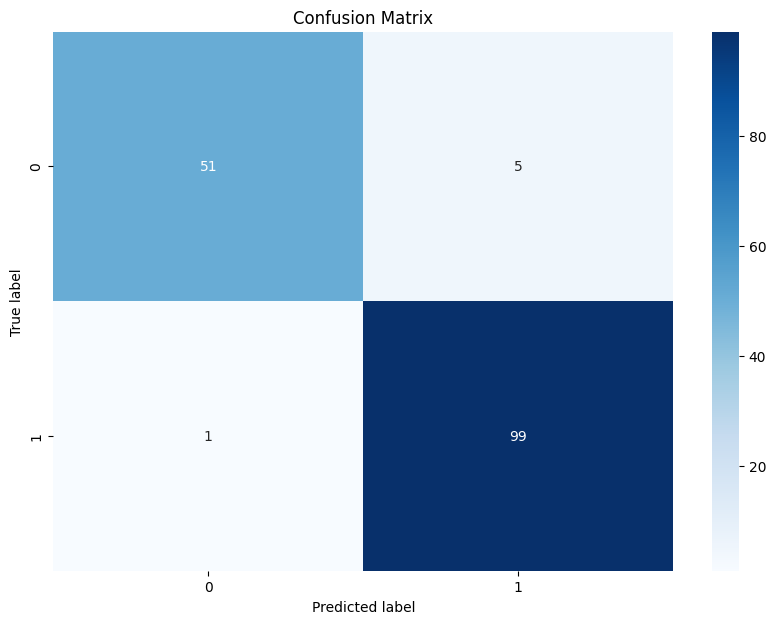

In [47]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat1, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [64]:
conf_mat2 = confusion_matrix(y_test, y_pred2)

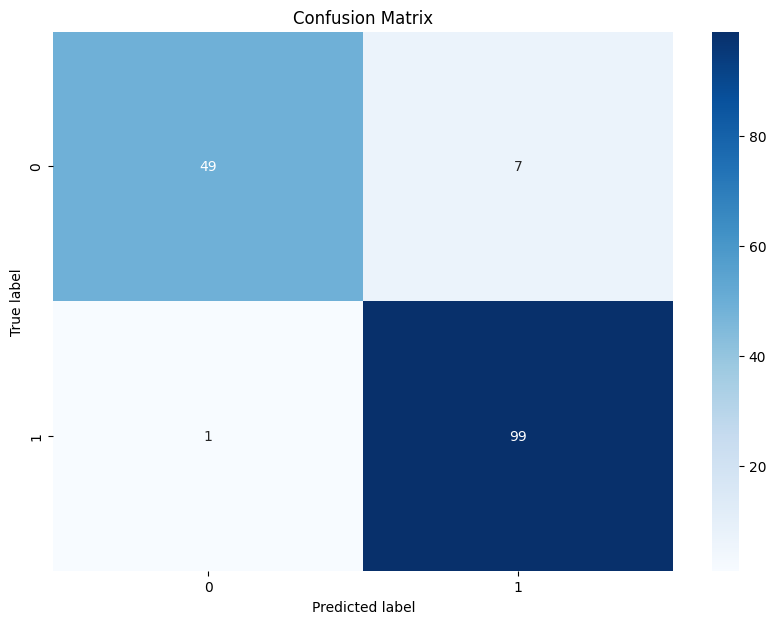

In [65]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat2, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [50]:
conf_mat3 = confusion_matrix(y_test, y_pred3)

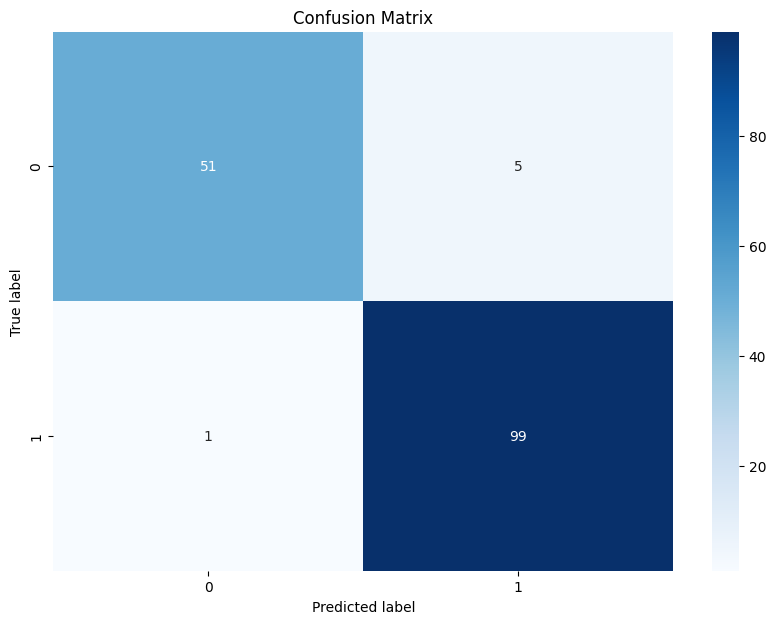

In [51]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat3, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [52]:
from sklearn.tree import plot_tree

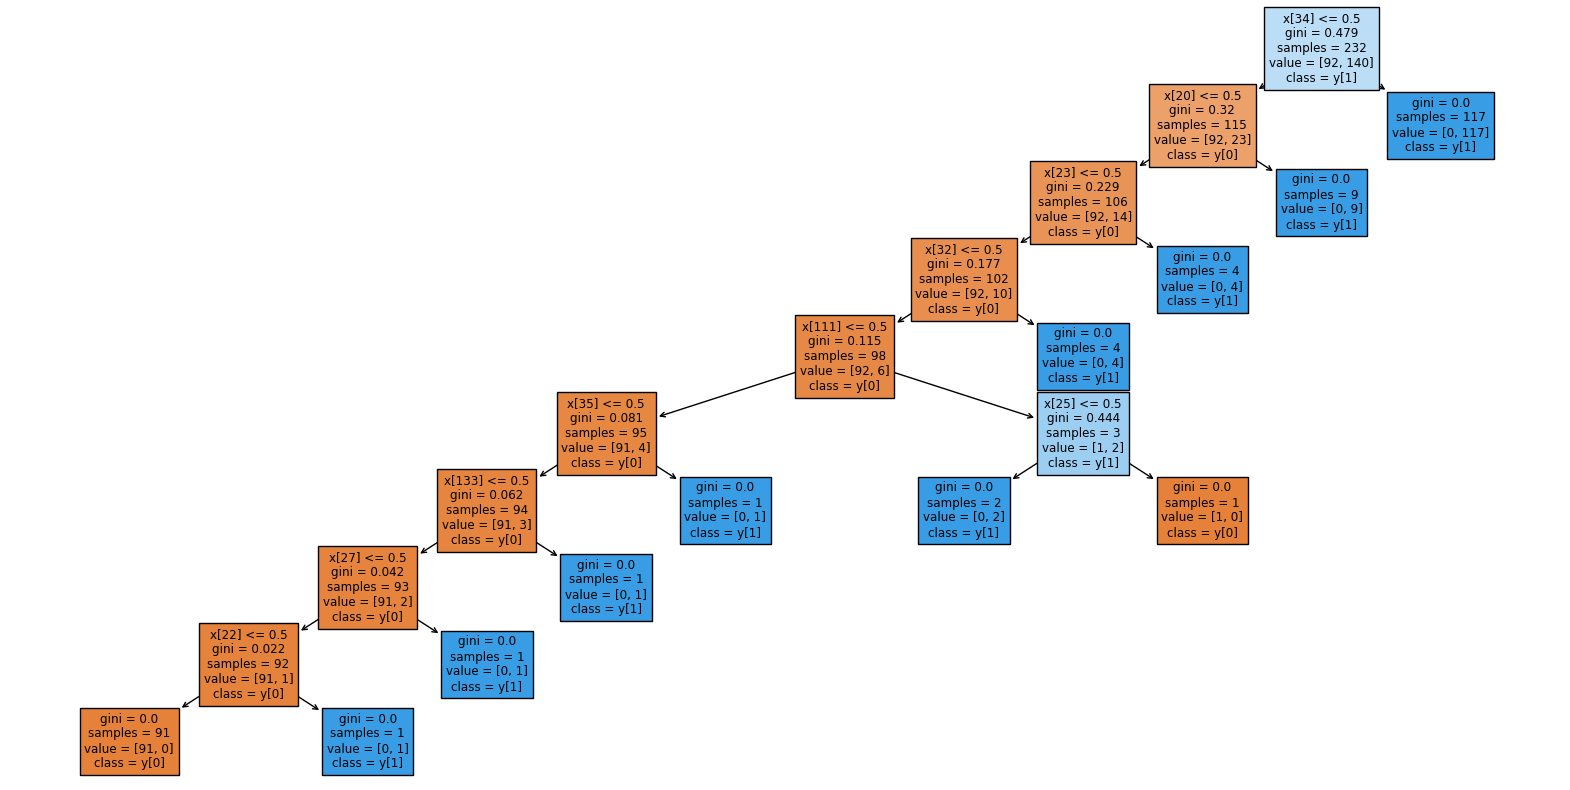

In [57]:
plt.figure(figsize=(20,10))
plot_tree(model1.named_steps['classifier'], filled=True, class_names=True)
plt.show()

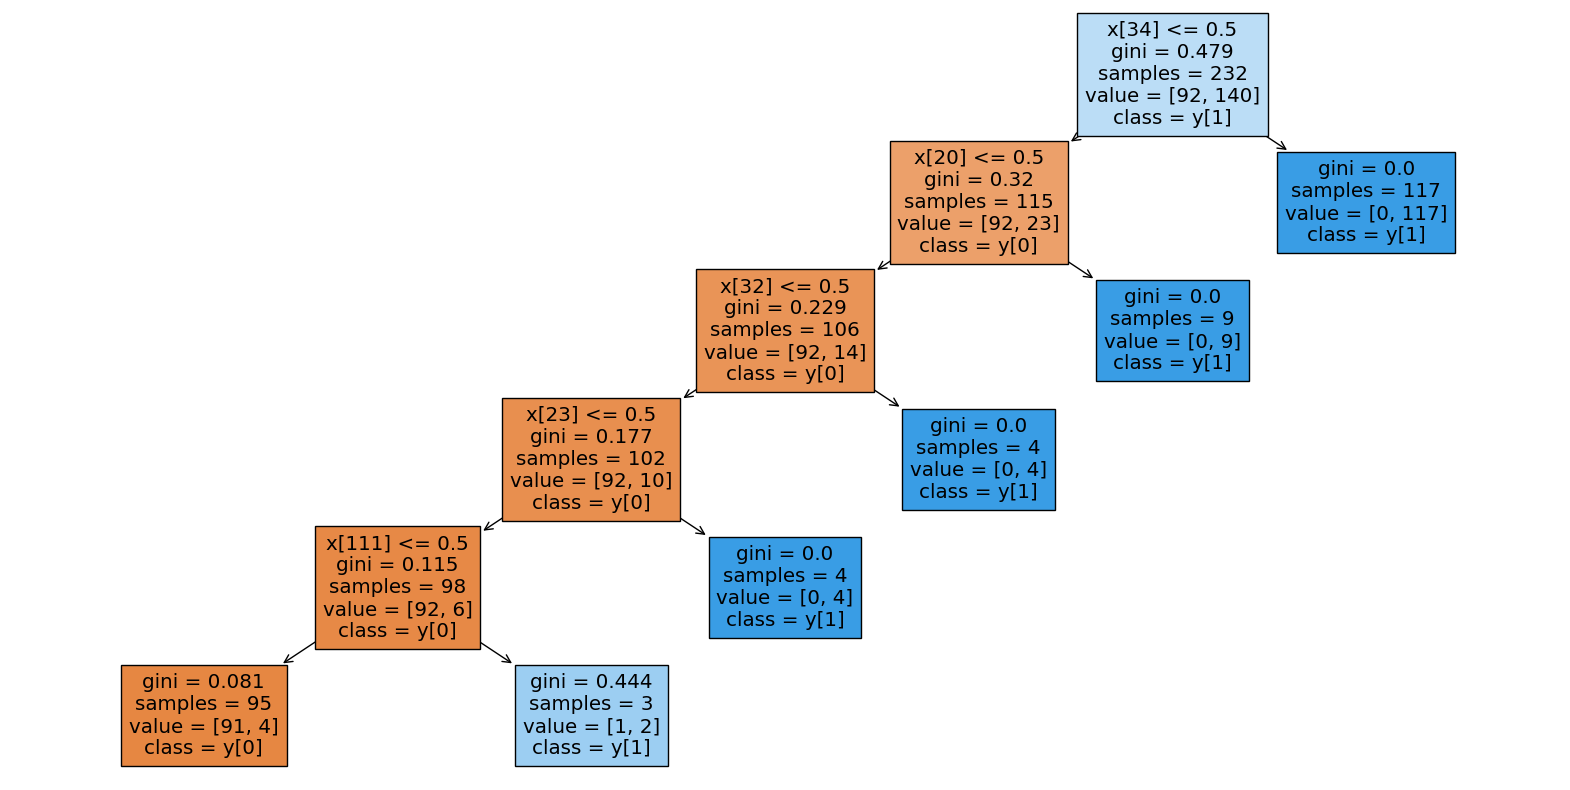

In [58]:
plt.figure(figsize=(20,10))
plot_tree(model2.named_steps['classifier'], filled=True, class_names=True)
plt.show()

In [59]:
plt.figure(figsize=(20,10))
plot_tree(model3.named_steps['classifier'], filled=True, class_names=True)
plt.show()

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 2000x1000 with 0 Axes>